## Homework Three

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

from sklearn import metrics

In [3]:
# Import dataset
df = pd.read_csv("bill_authentication.csv")
df1 = df.copy(deep=True)
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [4]:
# Remove target var from dataset
x = df.drop('Class', axis=1)
y = df['Class']

# Standardize
x = StandardScaler().fit_transform(x)

In [5]:
# One pt 1

pca = PCA(n_components=2) 

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca.explained_variance_ratio_

array([0.54497602, 0.32328872])

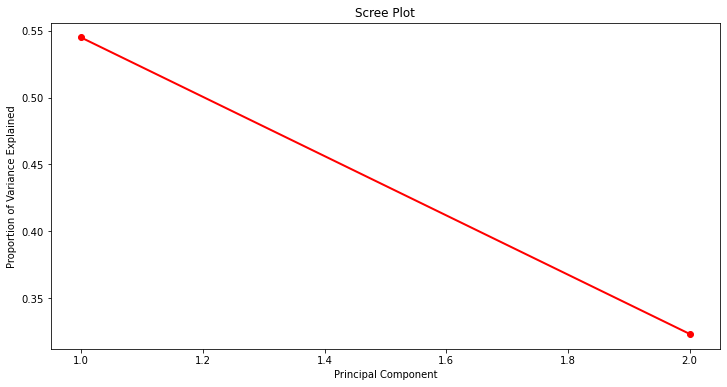

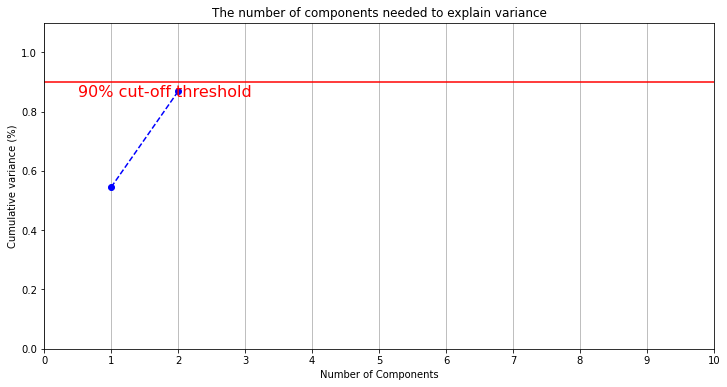

In [11]:
# Two pt 1
PC2values = np.arange(pca.n_components_) + 1
plt.plot(PC2values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 3, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [6]:
# One pt 2

pca2 = PCA(n_components=3) 

principalComponents2 = pca2.fit_transform(x)

principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

pca2.explained_variance_ratio_

array([0.54497602, 0.32328872, 0.08784561])

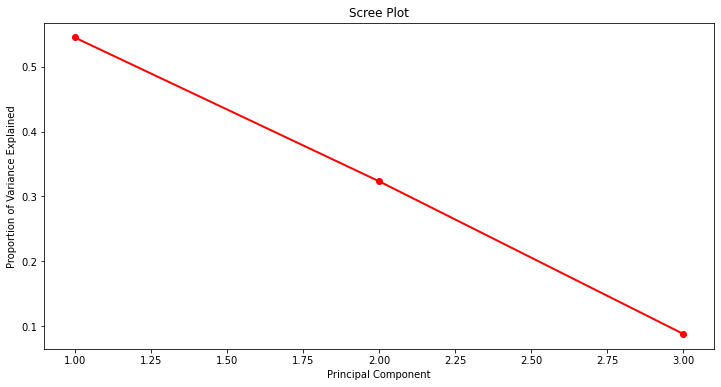

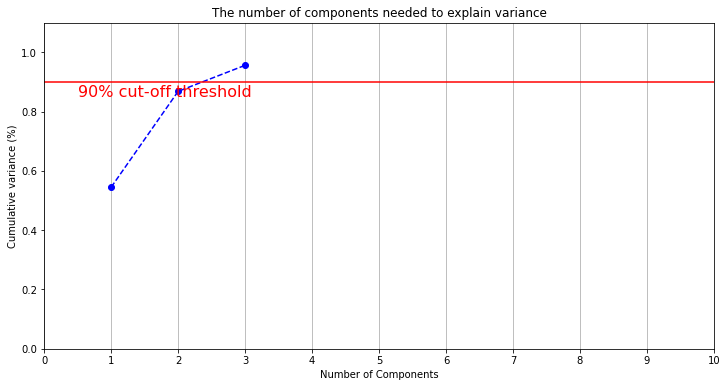

In [12]:
# Two pt 2
PC3values = np.arange(pca2.n_components_) + 1
plt.plot(PC3values, pca2.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()


plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 4, step=1)
yi = np.cumsum(pca2.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [20]:
# Three

x_train, x_test, y_train, y_test = train_test_split(principalDf2,y,test_size=.2, random_state=1)

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Logistic Regression Confusion Matrix:",confusion_matrix(y_test,y_pred))


svclassifier = SVC(kernel='linear') # creating an object
svclassifier.fit(x_train, y_train) # fiting the data to the model

y_pred = svclassifier.predict(x_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("SVC Confusion Matrix",confusion_matrix(y_test,y_pred))

Logistic Regression Accuracy: 0.9236363636363636
Logistic Regression Confusion Matrix: [[148   9]
 [ 12 106]]
SVC Accuracy: 0.9236363636363636
SVC Confusion Matrix [[149   8]
 [ 13 105]]
